In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('exportRappel-2023-10-22-14h54m49s.csv', sep=";")

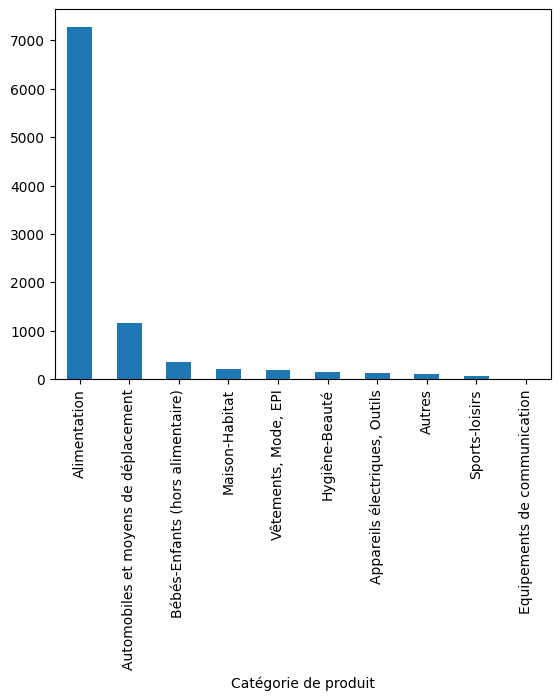

In [3]:
# 1. Bar chart of "Catégorie de produit"
df['Catégorie de produit'].value_counts().plot(kind='bar')
plt.show()

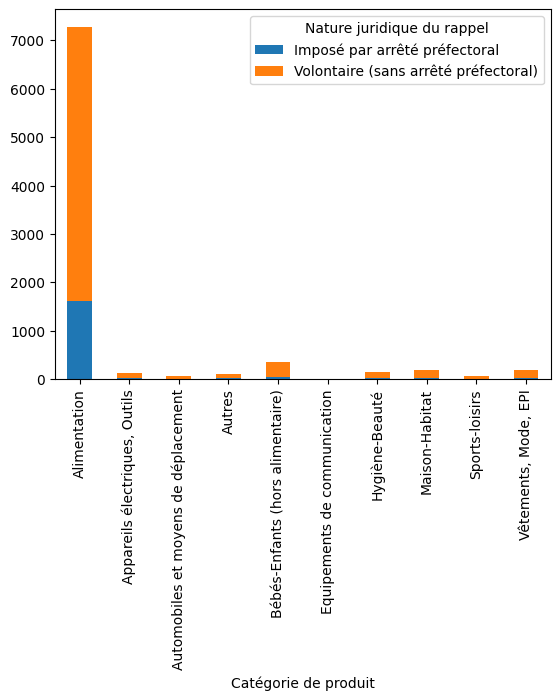

In [4]:
# 2. Stacked bar chart of "Nature juridique du rappel"
df.groupby(['Catégorie de produit','Nature juridique du rappel']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [5]:
# Replace variations in the date column to standardize it
df['Date début/Fin de commercialisation'] = df['Date début/Fin de commercialisation'].replace({"Depuis le ": "Du ", "": "Du NaN"}, regex=True)

# Do the split and conversion
df[['Début','Fin']] = df['Date début/Fin de commercialisation'].str.replace('Du ', '', regex=True).str.split(' au ', expand=True)

df['Date début commercialisation'] = pd.to_datetime(df['Début'], dayfirst=True, errors='coerce')
df['Date fin commercialisation'] = pd.to_datetime(df['Fin'], dayfirst=True, errors='coerce')

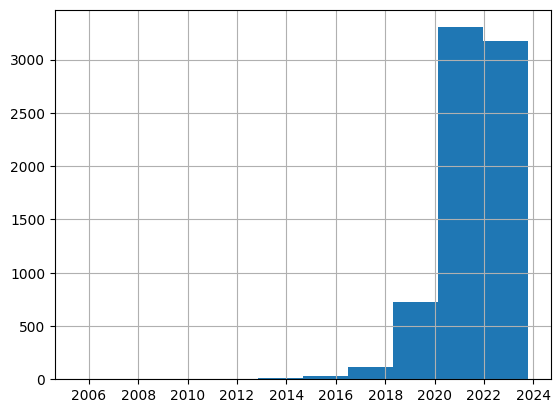

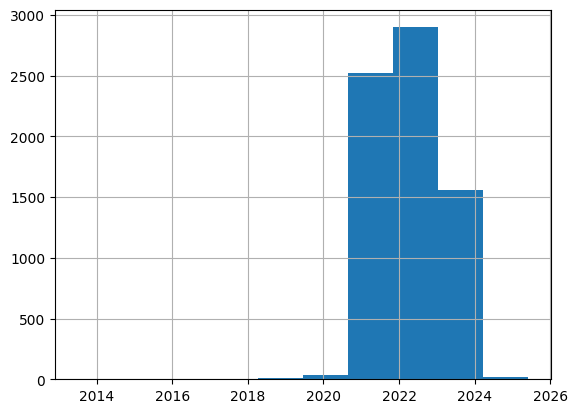

In [6]:
# 3. Histogram of "Date début commercialisation" and "Date fin commercialisation"
df['Date début commercialisation'].hist()
plt.show()

df['Date fin commercialisation'].hist()
plt.show()

In [ ]:
# 4. Bar chart of "Motif du rappel"
# Remove special characters (\t and \n) from "Motif du rappel"

#df['Motif du rappel'] = df['Motif du rappel'].replace(r'\W', ' ', regex=True)

# Plot the bar chart
#df['Motif du rappel'].value_counts().plot(kind='bar')
#plt.show()

In [8]:
# 5. Pie chart of "Zone géographique de vente"
#df['Zone géographique de vente'].value_counts().plot(kind='pie')
#plt.show()

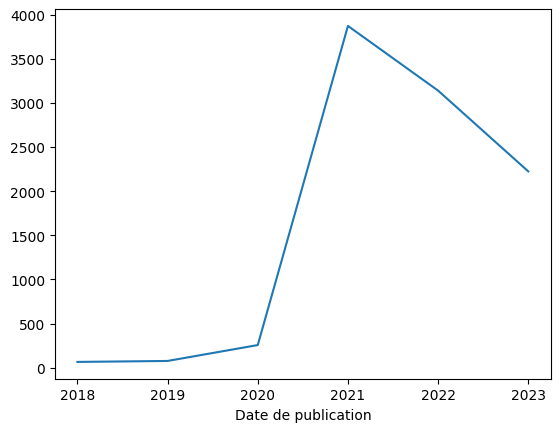

In [9]:
# 6. Line plot of "Date de publication"
df['Date de publication'] = pd.to_datetime(df['Date de publication'], dayfirst=False)
df.groupby(df['Date de publication'].dt.year).size().plot()
plt.show()

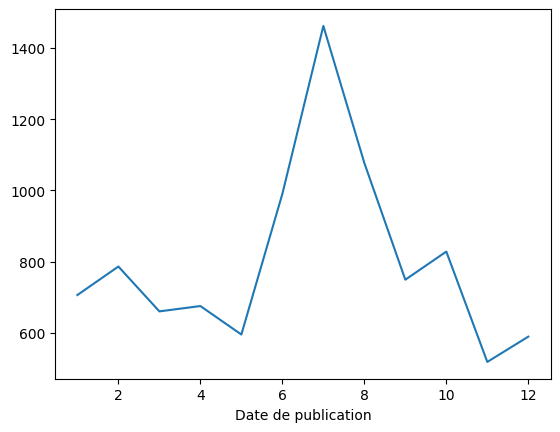

In [10]:
# 6.bis Line plot of "Date de publication"
df['Date de publication'] = pd.to_datetime(df['Date de publication'], dayfirst=False)
df.groupby(df['Date de publication'].dt.month).size().plot()
plt.show()

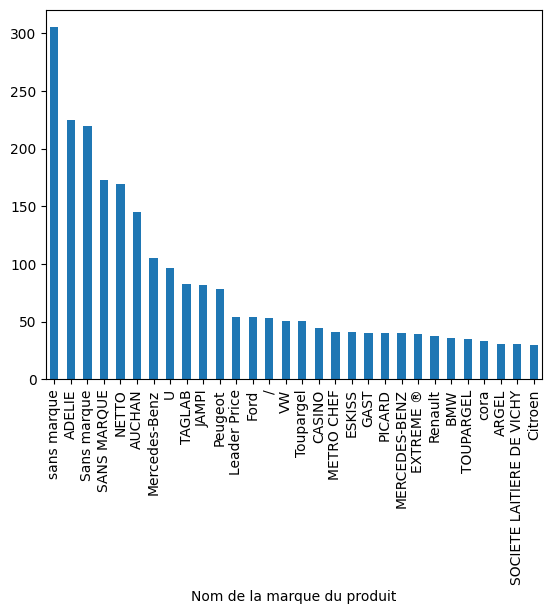

In [11]:
# 7. Bar chart of "Nom de la marque du produit"
df['Nom de la marque du produit'].value_counts().head(30).plot(kind='bar') # Limit to top 10 to prevent overcrowded chart
plt.show()

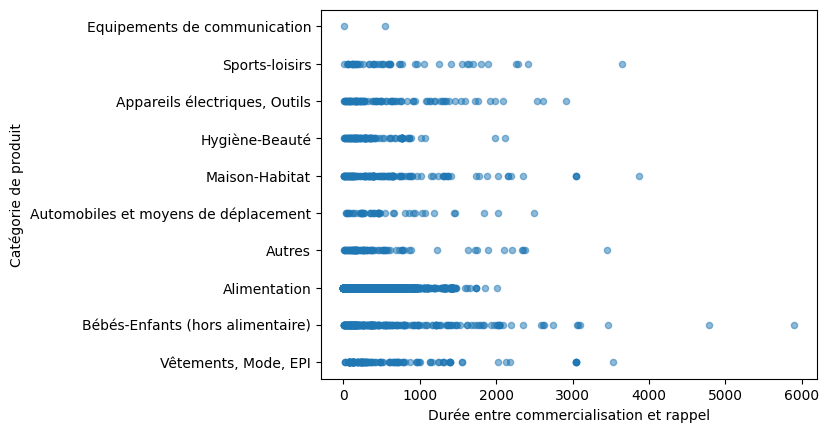

In [12]:
# 8. Scatter plot of "Durée entre commercialisation et rappel vs catégorie de produit"
df['Durée entre commercialisation et rappel'] = (df['Date fin commercialisation'] - df['Date début commercialisation']).dt.days

# Remove rows where 'Durée entre commercialisation et rappel' is NaN
df = df[df['Durée entre commercialisation et rappel'].notnull()]

# Now plot
df.plot.scatter(x='Durée entre commercialisation et rappel', y='Catégorie de produit', alpha=0.5)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


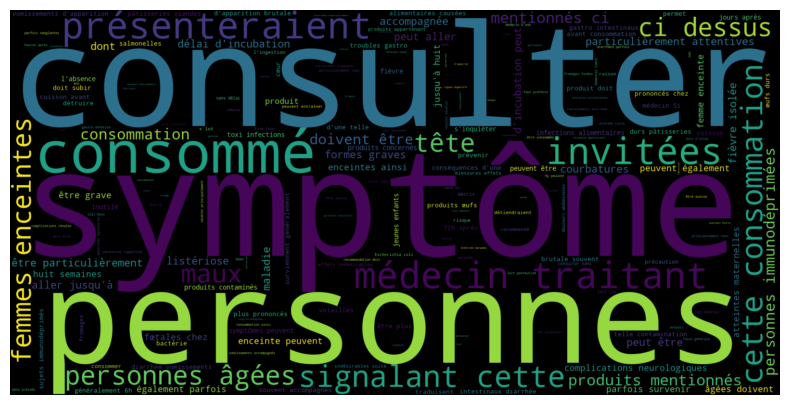

In [18]:
# 9. Word cloud of "Préconisations sanitaires"
# Import libraries
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Get French stopwords
stopwords_fr = set(stopwords.words('french'))

# Prepare text for wordcloud
text = ' '.join(df['Préconisations sanitaires'].dropna())

# Create and display wordcloud, while removing stopwords and setting custom size
wordcloud = WordCloud(stopwords=stopwords_fr, width=1600, height=800).generate(text)

# Use larger figure size to reflect larger wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

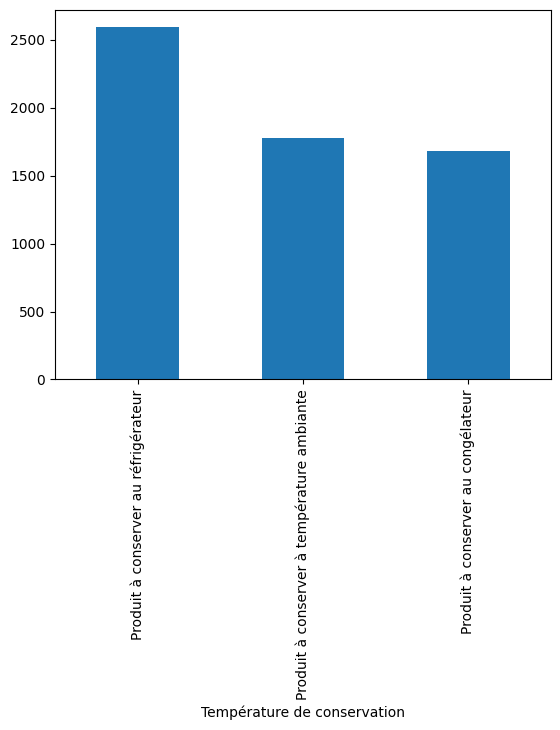

In [15]:
# 10. Bar chart of "Température de conservation"
df['Température de conservation'].value_counts().plot(kind='bar')
plt.show()